### Importing dependencies

In [22]:
import matplotlib.pyplot as plt
from matplotlib import cm
import csv
import numpy as np
import pandas as pd

from scipy.stats import linregress


### Reading the data

In [23]:
# Study data files
world_suicide_data_path = "Suicide_Data/master.csv"

continent_path = "Suicide_Data/continents.csv"
# Read the data and the study results
world_suicide_data = pd.read_csv(world_suicide_data_path)
continent_data=pd.read_csv(continent_path)



   ### Studying the raw data files

In [24]:
continent_data.head()

,country,continent
0,Algeria,Africa
1,Angola,Africa
2,Aruba,South America
3,Benin,Africa
4,United States,North America


In [25]:
world_suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [26]:
world_suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [27]:
# Fixed Republic of Korea in the continents
world_suicide_df=world_suicide_data.merge(continent_data, on="country", how="left" )
world_suicide_df.columns


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation', 'continent'],
      dtype='object')

In [28]:
world_suicide_df=world_suicide_df[[ 'continent','country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']]
world_suicide_df.head()

,continent,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Europe,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Europe,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Europe,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Europe,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Europe,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [29]:
dseries=world_suicide_df["year"].value_counts()
dseries


2009    1068
2001    1056
2010    1056
2007    1032
2011    1032
2002    1032
2003    1032
2000    1032
2006    1020
2008    1020
2005    1008
2004    1008
1999     996
2012     972
2013     960
1998     948
2014     936
1995     936
1996     924
1997     924
1994     816
1992     780
1993     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: year, dtype: int64

In [30]:
ds=world_suicide_df["country"].value_counts()
print(ds)

Iceland                   382
Netherlands               382
Mauritius                 382
Austria                   382
Luxembourg                372
                         ... 
Bosnia and Herzegovina     24
Macau                      12
Dominica                   12
Cabo Verde                 12
Mongolia                   10
Name: country, Length: 101, dtype: int64


In [31]:
world_suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   continent           27820 non-null  object 
 1   country             27820 non-null  object 
 2   year                27820 non-null  int64  
 3   sex                 27820 non-null  object 
 4   age                 27820 non-null  object 
 5   suicides_no         27820 non-null  int64  
 6   population          27820 non-null  int64  
 7   suicides/100k pop   27820 non-null  float64
 8   country-year        27820 non-null  object 
 9   HDI for year        8364 non-null   float64
 10   gdp_for_year ($)   27820 non-null  object 
 11  gdp_per_capita ($)  27820 non-null  int64  
 12  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 3.0+ MB


In [32]:
#Write filtered data to new CSV
# Output File (CSV)
output_data_file = "Output_Data/merged.csv"

#Extract relevant fields from the data frame
# Export the City_Data into a csv
#world_suicide_df.to_csv(r'../output_data/merged.csv', index=False)
world_suicide_df.to_csv('Output_Data/merged.csv', index=False)

In [36]:
# #Filtering the data

world_suicide_df = world_suicide_df.loc[(world_suicide_df["year"]<=1999)]
world_suicide_df["country"].value_counts()

Iceland       180
Japan         180
Greece        180
Italy         180
Ecuador       180
             ... 
Dominica       12
Qatar          12
Macau          12
Cyprus         12
San Marino     12
Name: country, Length: 91, dtype: int64

In [39]:
world_suicide_df.columns

Index(['continent', 'country', 'year', 'sex', 'age', 'suicides_no',
       'population', 'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [42]:
world_suicide_df['gdp_per_capita ($)'].values #x

array([796, 796, 796, ..., 801, 801, 801], dtype=int64)

In [43]:
world_suicide_df['population'].values #x

array([ 312900,  308000,  289700, ..., 2257145, 3260451, 3155241],
      dtype=int64)

In [44]:
world_suicide_df[ 'suicides/100k pop'].values

array([6.71, 5.19, 4.83, ..., 3.94, 1.81, 0.57])

In [59]:
new_x = np.concatenate(([world_suicide_df['gdp_per_capita ($)'].values],[world_suicide_df['population'].values]))
new_x

array([[    796,     796,     796, ...,     801,     801,     801],
       [ 312900,  308000,  289700, ..., 2257145, 3260451, 3155241]],
      dtype=int64)

In [60]:
new_y = world_suicide_df[ 'suicides/100k pop'].values

In [64]:
from scipy.optimize import curve_fit
import scipy

def fn(x, a, b, c):
    return a + b*x[0] + c*x[1] 

# x = scipy.array([[0,1,2,0,1,2,0,1,2,],[0,0,0,1,1,1,2,2,2]])
# y = scipy.array([0,1,2,1,2,3,2,3,4])
popt, pcov = curve_fit(fn, new_x, new_y)
print(popt)

[ 1.24062173e+01  1.43247574e-04 -8.58357828e-08]


In [68]:

predicted_y = fn(new_x, 1.24062173e+01,  1.43247574e-04, -8.58357828e-08 )
predicted_y


array([12.49338435, 12.49380495, 12.49537574, ..., 12.3272148 ,
       12.24109524, 12.25012603])

In [67]:
new_y

array([6.71, 5.19, 4.83, ..., 3.94, 1.81, 0.57])

In [73]:
print(len(new_x[0]), len(new_x[1]) ,len(new_y))

11652 11652 11652


<IPython.core.display.Javascript object>


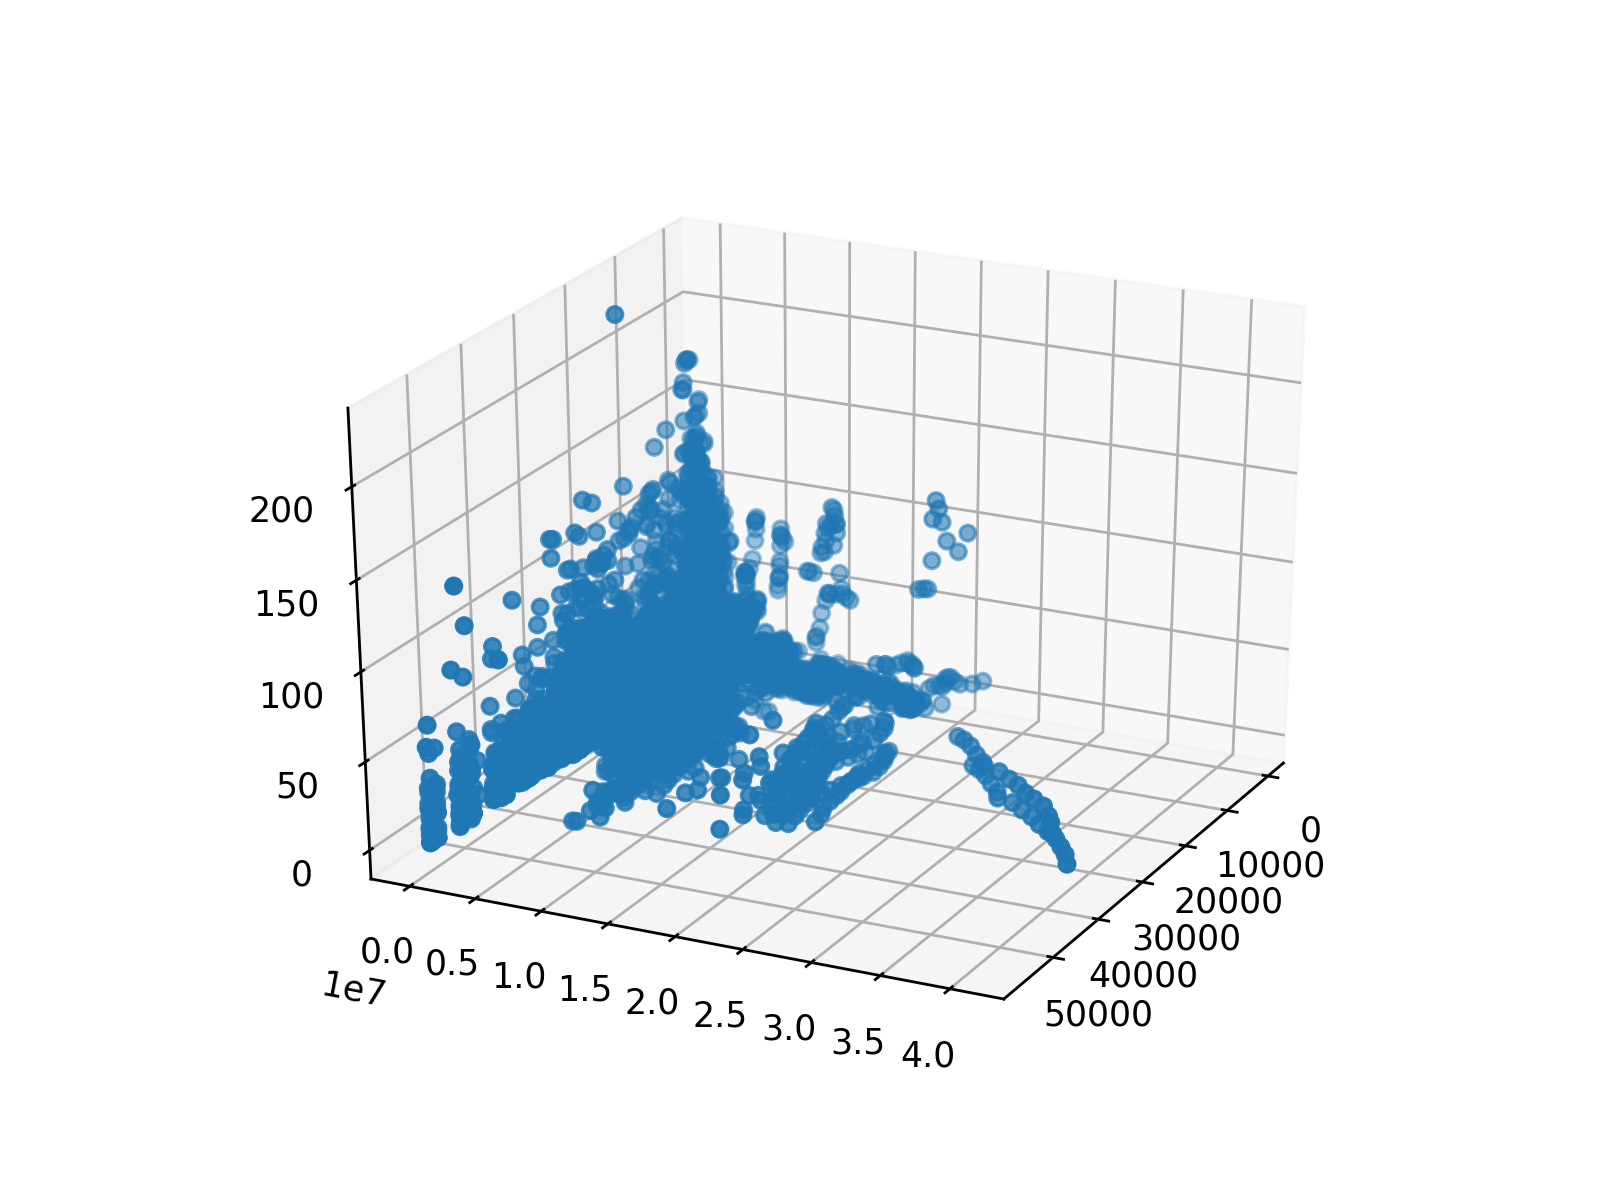

In [81]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(np.array(new_x[0]),np.array( new_x[1]), np.array(new_y))

In [ ]:
# #Write filtered data to new CSV
# # Output File (CSV)
# output_data_file = "output_data/cities.csv"

# #Extract relevant fields from the data frame
# # Export the City_Data into a csv
#clean_city_data.to_csv(r'../output_data/cities.csv', index=False)

In [ ]:
# #Linear Regression
# x_values = northern_hem_df['Lat']
# y_values = northern_hem_df['Humidity']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(20,38),fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')

# print(f"The r-squared is: {rvalue**2}")
# print(line_eq)


# plt.show()

In [ ]:
# # Scatter Plot example
# windsp=clean_city_data["Wind Speed"].tolist()

# plt.scatter(latitude, windsp, marker="o", facecolors="teal", edgecolors="black",
#             alpha=0.5)

# plt.xlabel('Latitude')
# plt.ylabel("Wind Speed (mph)")
# plt.title(f'City Latitude vs. Wind Speed {startdt(clean_city_data)}')
# plt.grid(True)

# plt.savefig(r'../output_data/plot4.png')
# plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11652 entries, 0 to 27675
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   continent           11652 non-null  object 
 1   country             11652 non-null  object 
 2   year                11652 non-null  int64  
 3   sex                 11652 non-null  object 
 4   age                 11652 non-null  object 
 5   suicides_no         11652 non-null  int64  
 6   population          11652 non-null  int64  
 7   suicides/100k pop   11652 non-null  float64
 8   country-year        11652 non-null  object 
 9   HDI for year        1800 non-null   float64
 10   gdp_for_year ($)   11652 non-null  object 
 11  gdp_per_capita ($)  11652 non-null  int64  
 12  generation          11652 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 1.2+ MB
